In [3]:
# import
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

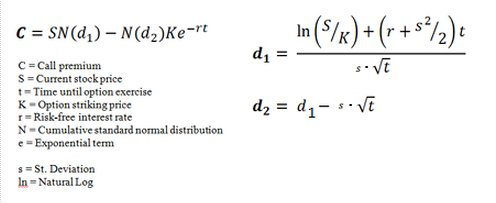

In [14]:
# define d1
def d1(S,K,r,stdev,T):
    return (np.log(S/K)+(r+stdev**2/2)*T)/(stdev*np.sqrt(T))
# define d2
def d2(S,K,r,stdev,T):
    return (np.log(S/K)+(r-stdev**2/2)*T)/(stdev*np.sqrt(T))

In [5]:
# define black schole formula
def BSM(S,K,r,stdev,T):
    return (S*norm.cdf(d1(S,K,r,stdev,T)))-(K*np.exp(-r*T)*norm.cdf(d2(S,K,r,stdev,T)))

In [15]:
ticker='PG' # the stock
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo')['Adj Close'] #get the data

In [21]:
s=data.iloc[-1]  # get the las price

In [22]:
log_returns=np.log(1+data.pct_change()) # calculate the logaritmic daily return

In [23]:
stdev=log_returns.std()*250**0.5 # calculate the anually standard deviation

In [34]:
r=0.025 #risk free
K=110.0 #strike price 
T=1 #1 yar

In [36]:
BSM(s,K,r,stdev,T) # get price for an option

PG    14.096957
Name: 2020-05-18 00:00:00, dtype: float64